# Predicción de Ventas en Cadena de Tiendas
Por: *Nindirí Armenta*

## Planteamiento del problema y Objetivo:

El objetivo es construir un modelo de regresión (baseline) para predecir las **ventas por producto de una tienda**, que forma parte de una cadena de tiendas y supermercados, y descubrir cuáles son los **principales factores que influencian dicha predicción**.

### Importando Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from scipy import stats

### Lectura de los datasets

In [2]:
data_train = pd.read_csv('data\Train_BigMart.csv')
data_test = pd.read_csv('data\Test_BigMart.csv')
# Identificando la data de train y de test, para posteriormente unión y separación
data_train['Set'] = 'train'
data_test['Set'] = 'test'

Combinando los dataset de *entrenamiento y test* para proceder a realizar la exploración, visualización, limpieza de datos, y posterior ingeniería de características y codificación de variables.

In [3]:
data = pd.concat([data_train, data_test], ignore_index=True, sort=False)
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


## Exploración de los Datos
Obteniendo una visión general del conjunto de datos y verificando los tipos de datos, conociendo las posibles variables de entradas y el target; así también la distribución de estos valores:

In [4]:
print('Variables:', list(data.columns))

Variables: ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Set']


###  Resumen de los datasets

In [5]:
print('Número de registros de train:', data_train.shape[0], '  -   Número de variables:', data_train.shape[1])
print('Número de registros de test:', data_test.shape[0], '  -   Número de variables:', data_test.shape[1])
print('Número de registros totales:', data.shape[0], '  -   Número de variables:', data.shape[1])

Número de registros de train: 8523   -   Número de variables: 13
Número de registros de test: 5681   -   Número de variables: 12
Número de registros totales: 14204   -   Número de variables: 13


Visión general de las variables en cada dataset:

In [6]:
print('Dataset de entrenamiento:\n')
data_train.info()
print('\nDataset de test:\n')
data_test.info()
print('\nDataset de total:\n')
data.info()
#data_train.info(), data_test.info(), data.info()

Dataset de entrenamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Set                          8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB

Dataset de test:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
Item_Identifier        

Se tienen 8 variables de tipo "object" (que corresponden a variables de tipo categórica que más adelante se codificaran), 4 de tipo float64 y 1 de tipo int64 (estas 2 últimas corresponde a variables de tipo numéricas). Por lo que no corresponde por el momento realizar algún cambio en el tipo de variables.

Se tiene una columna más en los datasets de train y total, correspondiente al Target (Item_Outlet_Sales).

Se verifica la presencia de alguno valores faltantes. Que más adelante se trabajará con ellos.

### Variables:

- Item_Identifier: nombre o identificador del producto 
- Item_Weight: peso del producto (en gramos)
- Item_Fat_Content: clasificación del producto en términos de grasas contenidas en él. 
- Item_Visibility: scoring de visibilidad del producto: medida que hace referencia al conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el producto? 
- Item_Type: tipo de producto 
- Item_MRP: máximum retailed price. Precio calculado por el fabricante que indica el precio más alto que se puede cobrar por el producto. 
- Outlet_Identifier: identificador de la tienda 
- Outlet_Establishment_Year: año de lanzamiento de la tienda 
- Outlet_Size: tamaño de la tienda 
- Outlet_Location_Type: clasificación de las tiendas según ubicación 
- Outlet_Type: tipo de tienda 
- Item_Outlet_Sales: ventas del producto en cada observacion

## Planteamiento de Hipótesis:
Respecto a las variables que se disponen en el dataset y de acuerdo al objetivo propuesto, se plantean algunas hipótesis:
- El peso del producto no debería influir en los niveles de venta de la tienda.
- El contenido de grasas de los productos puede ser significativo pra el nivel de venta (Los productos con mayor contenido de grasa quiezás se compran menos).
- La visibilidad de un producto incide en el nivel de venta de la tienda (generalmente los productos más costosos se exhiben en sitios de fácil visualización para el cliente).
- El tipo de producto puede influir en el nivel de ventas (existe productos de mayor y menor rotación, pero también de mayor y menor precio).
- El precio de un producto es un factor que está directamente asociado con el nivel de ventas.
- El año de lanzamiento de la tienda, da información del tiempo de vida que puede tener la tienda; esto podría influir en el nivel del conocimiento que tiene el cliente de la existencia de la tienda, y por ende de su nivel de ventas.
- A mayor tamaño de la tienda, mayor nivel de ventas. Las personas le suelen gustar los lugares amplios para ir de compras.
- La ubicación de la tienda es un factor preponderante en el acceso al cliente y por ende en el nivel de ventas.

## Análisis de Datos:
### Análisis univariado

### Resumen estadístico de variables cuantitativas o numéricas:
Obtener más información de los datos a través de el comportamiento y distribución de los mismos.

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Máximos y mínimos:

Se observan valores dentro de rangos razonables respecto de cada tipo de variable. El valor 0 en Item_Visibility podría sugerir un registro inadecuado, sin embargo para esta fase no realizaré cambios al respecto.

- Media y Desviación estándar:

En general se observan valores muy dispersos (no aplica este análisis para "Outlet_Establishment_Year")

- Recuento (count):

Refleja valores perdidos en la variable "Item_Weight" (la diferencia de valores en la variable "Item_Outlet_Sales" corresponde a los valores de TARGET en el train dataset)

**La variable "Outlet_Establishment_Year" será tomada como vida del establecimiento en años, la cual puede dar una información más valiosa.**

### Visualizando las variables numéricas:

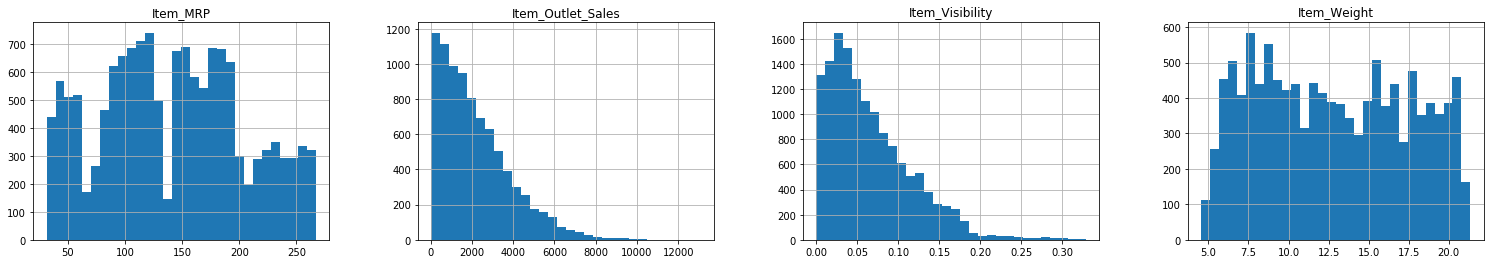

In [8]:
# Visualización de las caraterísticas númericas de entrada
data.hist(column=['Item_Weight', 'Item_Visibility',	'Item_MRP', 'Item_Outlet_Sales'], figsize=(26,4), bins=30, layout=(1,4))
plt.show()

TARGET: Las ventas de la tiendas (Item_Outlet_Sales) presentan una distribución con sesgo positivo, es decir, sus valores se concentran más en los niveles de ventas inferiores.

Los pesos de los productos (Item_Weight) presentan una distribución clara, no se encuentra concentración de frecuencias en valores específicos.

La visibilidad de los productos (Item_Visibility) también presenta una distribución sesgada positivamente, se observa mayor concentración en valores inferiores.

El precio máximo por producto (Item_MRP) presenta una distribución multimodal, de aproximadamente 4 niveles de precios distintos.

*Las variables sesgadas se les tratará para eliminar dicho sesgo.*

- Por ahora, se realizará el cálculo de años de vida de la tienda en base al año de establecimiento y el año actual (se asume que es data del actual año 2019):

In [9]:
# FEATURES ENGINEERING: para los años deñ establecimiento
data['Outlet_Establishment_Year'] = 2019 - data['Outlet_Establishment_Year']

## Definiendo las variables categóricas

### Resumen estadístico de variables categóricas:

In [10]:
data.describe(include = ['object', 'category'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Set
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,NCR30,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


- Item_Identifier posee muchos valores únicos que no se podrán analizar de esta manera tan dispersa, se puede tratar de agrupar según alguna patrón de la codificación.
- Item_Type también posee un número de características que se podrían agrupar para evitar trabajar con 16 valores; de ser conveniente para la predicción.
- Las demás variables tienen número de categorías finitas convenientes para el análisis.
- Se tienen valores faltantes en la variable Outlet_Size que habrá que trabajar.

Seguido se hace una exploración más detallada:

### Conociendo las variables categóricas:

In [11]:
categoricals = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for cat in categoricals:
    print(cat, ':', set(data[cat]))

Item_Fat_Content : {'LF', 'reg', 'low fat', 'Low Fat', 'Regular'}
Item_Type : {'Dairy', 'Household', 'Canned', 'Others', 'Meat', 'Frozen Foods', 'Health and Hygiene', 'Soft Drinks', 'Fruits and Vegetables', 'Baking Goods', 'Breads', 'Starchy Foods', 'Snack Foods', 'Seafood', 'Hard Drinks', 'Breakfast'}
Outlet_Identifier : {'OUT046', 'OUT010', 'OUT045', 'OUT019', 'OUT013', 'OUT049', 'OUT017', 'OUT035', 'OUT027', 'OUT018'}
Outlet_Size : {nan, 'High', 'Small', 'Medium'}
Outlet_Location_Type : {'Tier 1', 'Tier 3', 'Tier 2'}
Outlet_Type : {'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3', 'Grocery Store'}


Del análisis se observa:
- Para "Item_Fat_Content" diferentes etiquetas para la misma categoría. **Acción**: unificar etiquetas.
- Se considera reagrupar algunas categorías de "Item_Type".

### Limpieza de datos:

In [12]:
# LIMPIEZA: Unificando etiquetas para 'Item_Fat_Content'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':  'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

Verificamos la unificación de etiquetas:

In [13]:
set(data['Item_Fat_Content'])

{'Low Fat', 'Regular'}

### Miramos el comportamiento de las frecuencias de las variables categóricas:

In [14]:
for aux in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    print('\n', aux, ':\n', data[aux].value_counts())


 Item_Fat_Content :
 Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

 Item_Type :
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Outlet_Identifier :
 OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

 Outlet_Size :
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

 Outlet_Location_Type :
 Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Ou

### Visualizando la distribucón de frecuencias de las variables categóricas:

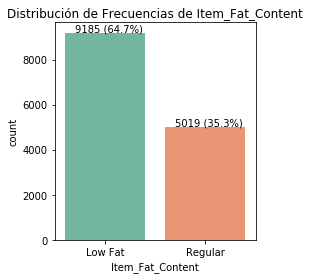

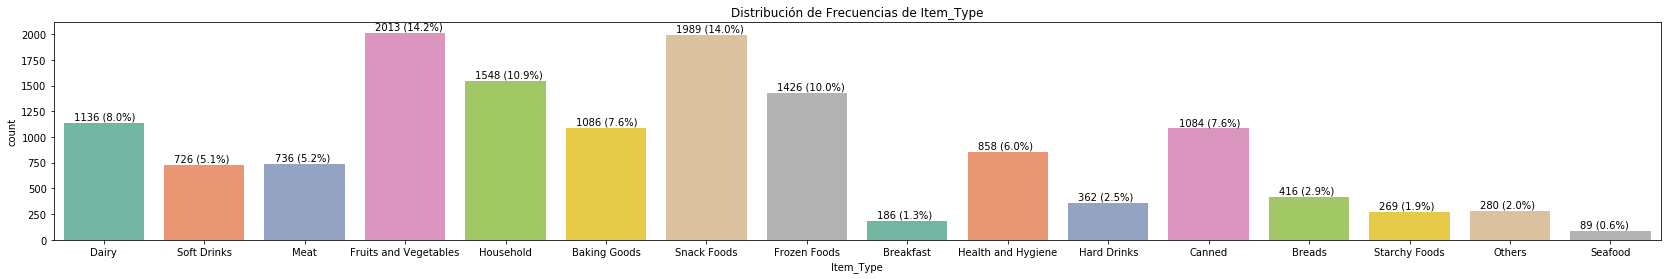

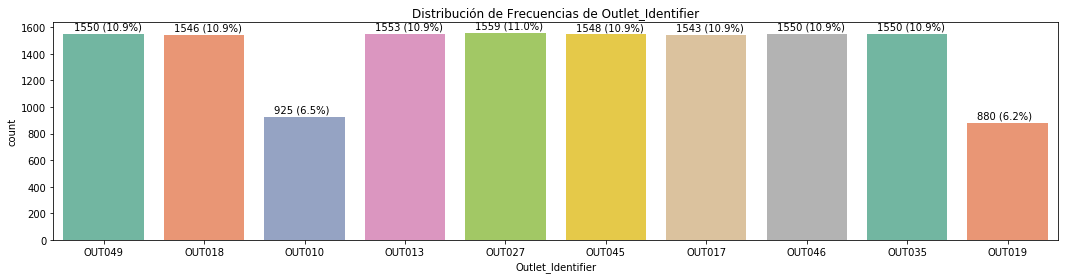

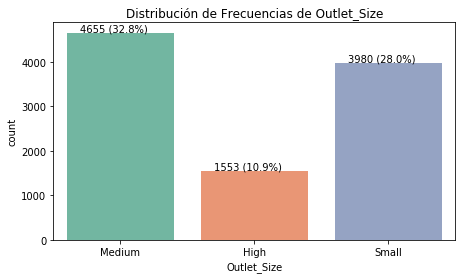

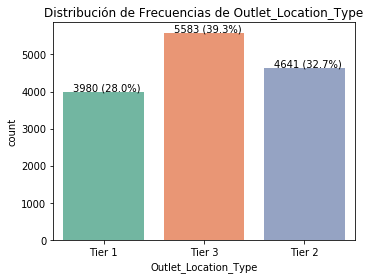

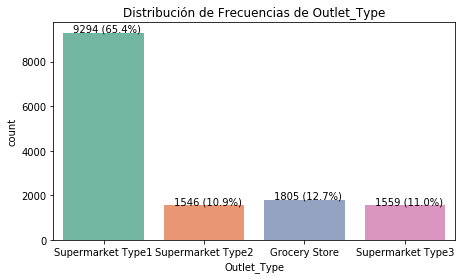

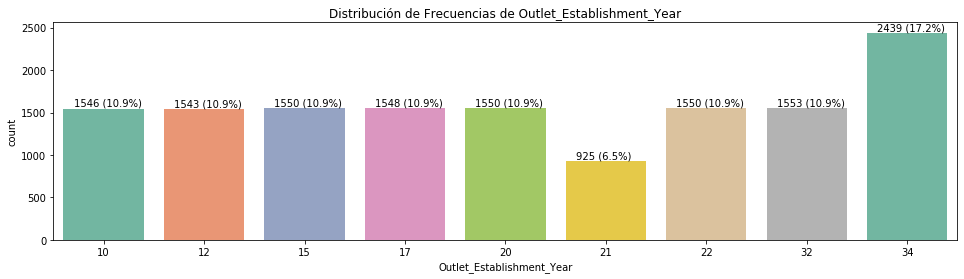

In [15]:
for var_cat in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']:
    ancho_bar = len(data[var_cat].unique())
    plt.figure(figsize=(ancho_bar*1.8,4))
    values = data[var_cat].dropna().sum()
    ax = sns.countplot(x= var_cat, data=data, palette='Set2')
    for p in ax.patches:
        ax.annotate('{:.0f} ({:.1f}%)'.format(p.get_height(), p.get_height()/len(data)*100), (p.get_x()+0.1, p.get_height()+30))
    plt.title('Distribución de Frecuencias de ' + var_cat)
    plt.show()

- El mayor porcentaje de producto corresponde a los bajos en grasas (aprox 65%)
- Los productos con mayor registros son los vegetales-frutas y los snacks, seguidos de los productos del hogar, enlatados, lácteos, congelados y horneados. 
- Las tiendas con menores registros son la OUT10 y OUT19, el resto de las tiendas tienen un número de registros similar.
- Se tienen mayores registros en la tiendas pequeñas y medianas.
- El mayor número de registros de ventas lo presentan las tiendas con locación Tier 3 y las tiendas de tipo Supermarket Type1.

#### Porcentaje de valores perdidos

In [16]:
print('El porcentaje de valores perdidos de las variables: \n')
for var in data.columns:
    num_nan = data[var].isnull().sum()
    print('{}: \t\t{} ({:,.2f}%)'.format(var, num_nan, num_nan*100/len(data)))

El porcentaje de valores perdidos de las variables: 

Item_Identifier: 		0 (0.00%)
Item_Weight: 		2439 (17.17%)
Item_Fat_Content: 		0 (0.00%)
Item_Visibility: 		0 (0.00%)
Item_Type: 		0 (0.00%)
Item_MRP: 		0 (0.00%)
Outlet_Identifier: 		0 (0.00%)
Outlet_Establishment_Year: 		0 (0.00%)
Outlet_Size: 		4016 (28.27%)
Outlet_Location_Type: 		0 (0.00%)
Outlet_Type: 		0 (0.00%)
Item_Outlet_Sales: 		5681 (40.00%)
Set: 		0 (0.00%)


Se tiene 17,17% de valores perdidos en la variable de pesos del producto, lo cual se puede solucionar asignando el peso de un producto similar o desde otro registro del mismo producto. De similar manera se puede realizar con los valores faltantes (28,27%) de la variable Tamaño del outlet.

Parte del dataset con valores perdidos en la variable 'Item_Weight':

In [17]:
data[data['Item_Weight'].isnull()].sort_values('Item_Identifier').head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
12435,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,34,Medium,Tier 3,Supermarket Type3,NaN,test
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,34,Medium,Tier 3,Supermarket Type3,4913.6040,train
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,34,Small,Tier 1,Grocery Store,491.3604,train
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,34,Medium,Tier 3,Supermarket Type3,7033.5112,train
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,34,Small,Tier 1,Grocery Store,555.2772,train


In [18]:
print(list(data[data['Item_Weight'].isnull()]['Outlet_Identifier'].unique()))

['OUT027', 'OUT019']


Los valores faltantes de pesos de los productos corresponden a las tiendas cuyo código son 'OUT027' y 'OUT019'

In [19]:
print(len(list(data[data['Item_Weight'].isnull()]['Item_Identifier'].unique())))

1559


Se tienen 1559 productos de los 2439 registros con valores perdidos en la variable 'Item_Weight'

Ahora se procede a rellenar los faltantes en los registros de pesos, basado en el valor modal del peso del producto. (Imputación de casos similares)

In [20]:
# LIMPIEZA: de faltantes en el peso de los productos
productos = list(data[data['Item_Weight'].isnull()]['Item_Identifier'].unique())
for producto in productos:
    moda = (data[data['Item_Identifier'] == producto][['Item_Weight']]).mode().iloc[0,0]
    data.loc[data['Item_Identifier'] == producto, 'Item_Weight'] = moda

Se verifica que no existan valores nulos para la variable peso del producto.

In [21]:
print('El porcentaje de valores perdidos de la variable "Item_Weight" es de:', data['Item_Weight'].isnull().sum()/len(data)*100)

El porcentaje de valores perdidos de la variable "Item_Weight" es de: 0.0


Se procede a revisar los faltantes de la variable tamaño de la tienda.

In [22]:
data[data['Outlet_Size'].isnull()].sort_values('Item_Identifier').tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
5271,NCZ41,19.85,Low Fat,0.064552,Health and Hygiene,125.2704,OUT045,17,NaN,Tier 2,Supermarket Type1,2127.8968,train
411,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,21,NaN,Tier 3,Grocery Store,711.0744,train
9642,NCZ42,10.50,Low Fat,0.011311,Household,238.7248,OUT045,17,NaN,Tier 2,Supermarket Type1,NaN,test
1115,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,12,NaN,Tier 2,Supermarket Type1,4029.4216,train
4924,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,21,NaN,Tier 3,Grocery Store,376.8428,train
11398,NCZ53,9.60,Low Fat,0.024527,Health and Hygiene,188.5214,OUT045,17,NaN,Tier 2,Supermarket Type1,NaN,test
10841,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,12,NaN,Tier 2,Supermarket Type1,NaN,test
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,21,NaN,Tier 3,Grocery Store,324.9104,train
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,17,NaN,Tier 2,Supermarket Type1,2274.3728,train
13223,NCZ54,14.65,Low Fat,0.083831,Household,161.4552,OUT017,12,NaN,Tier 2,Supermarket Type1,NaN,test


In [23]:
print(list(data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()))

['OUT010', 'OUT045', 'OUT017']


Los valores faltantes de tamaño de la tienda corresponden a las tiendas cuyo código son 'OUT010', 'OUT045' y 'OUT017'

Se procede primero a verificar qué valores de tamaño registran estas tiendas.

In [24]:
outlets = list(data[data['Outlet_Size'].isnull()]['Outlet_Identifier'].unique())
for outlet in outlets:
    categoria = data[data['Outlet_Identifier'] == outlet]['Outlet_Size'].unique()
    print(outlet, categoria)

OUT010 [nan]
OUT045 [nan]
OUT017 [nan]


Se observa que estas 3 tiendas no tienen registros del tamaño de su tienda. Para dar solución a esto se buscará algún tipo de asociación de otra variable con el tamaño, para realizar la estimación de la categoría.

### Análisis Bi-variado:
Variables Categóricas vs Categóricas:

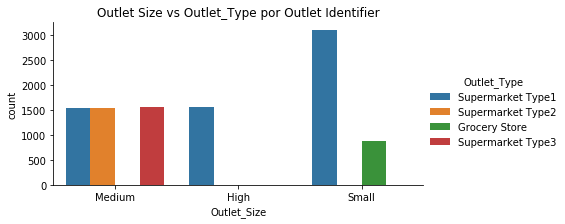

In [25]:
sns.catplot(x="Outlet_Size", hue='Outlet_Type', data=data, kind="count", height=3, aspect=2)
plt.title('Outlet Size vs Outlet_Type por Outlet Identifier')
plt.show()

- La mayoría de los "Supermarket Type 1" son de tamaño "Small".
- Las tiendas "Grocery Store" son de tamaño "Small".
- Las tiendas "Supermarket Type 2" y "Supermarket Type 3" son de tamaño "Medium".

- Outlet_Size vs Outlet_Type

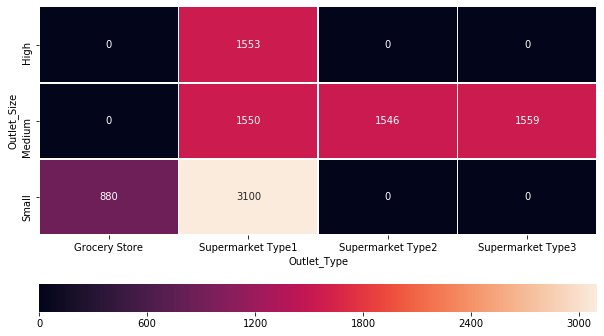

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(data['Outlet_Size'], data['Outlet_Type'], margins=False, normalize=False), annot=True, square=False, fmt='', cbar_kws={"orientation": "horizontal"}, linewidths=0.5)
plt.show()

Se observa que no existe una relación entre el tipo de tienda y el tamaño de la misma. 
- Item_Type vs Outlet_Type

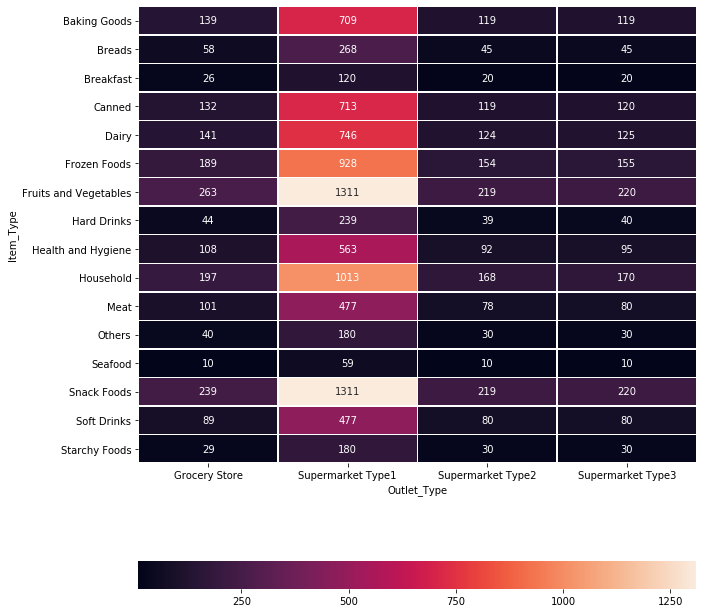

In [27]:
plt.figure(figsize=(10,12))
sns.heatmap(pd.crosstab(data['Item_Type'], data['Outlet_Type'], normalize=False), annot=True, square=False, fmt='', cbar_kws={"orientation": "horizontal"}, linewidths=0.5)
plt.show()

El Supermarket Type 2 y 3 presentan distribución similar respecto de los tipos de productos, al igual que en el tamaño de la tienda.
Vemos:
- Outlet_Location_Type vs Outlet_Type

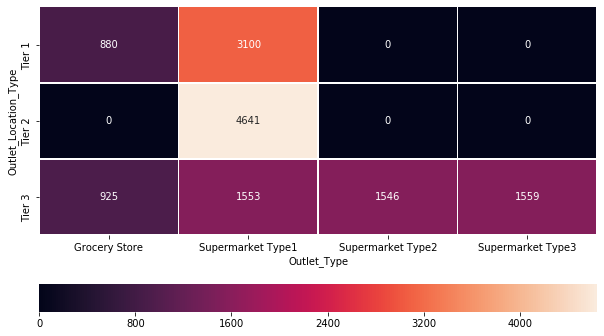

In [28]:
import statsmodels.api as sm
tab = pd.crosstab(data['Outlet_Location_Type'], data['Outlet_Type'], margins=False, normalize=False)
plt.figure(figsize=(10,6))
sns.heatmap(tab, annot=True, square=False, fmt='', cbar_kws={"orientation": "horizontal"}, linewidths=0.5)
plt.show()

- La mayor cantidad de registros son de la tienda "Supermarket Type 1" y de tamaño "Small"; en primer lugar de la ubicación "Tier 2" y en segundo de  la ubicación "Tier 1".

Veamos el tamaño de la tienda con respecto al nivel de ventas.

### Análisis Bi-variado:
Variables Categóricas vs Continuas:
- Veamos por un momento el tipo de tienda respecto a las ventas:

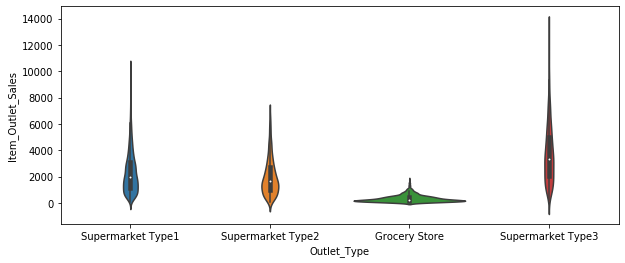


 KruskalResult(statistic=1626.9144438315932, pvalue=0.0)


In [29]:
plt.figure(figsize=(10,4))
sns.violinplot(x='Outlet_Type', y="Item_Outlet_Sales", data=data)
plt.show()

# H0: las medias son significativamente iguales entre los grupos (Se utiliza el test de Kruskal-Wallis por tratarse de una variable que no tiene una distribución normal)
print('\n', stats.kruskal(list(data.dropna().loc[data['Outlet_Type']== 'Supermarket Type1', 'Item_Outlet_Sales']), 
            list(data.dropna().loc[data['Outlet_Type']== 'Supermarket Type2', 'Item_Outlet_Sales']),
            list(data.dropna().loc[data['Outlet_Type']== 'Supermarket Type3', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Outlet_Type']== 'Grocery Store', 'Item_Outlet_Sales'])))

- Se evidencia diferencias significativas en los niveles de ventas por tipo de tienda.
- La distribución de frecuencia de las variables estudiadas arriba son similares para los tipos de tiendas "Supermarket Type 2" y "Supermarket Type 3"; sin embargo no lo es así el comportamiento de las ventas. Se dejarán estas categorias separadas como están originalmente.

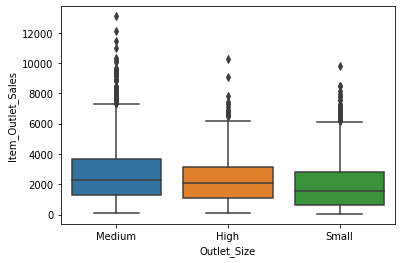

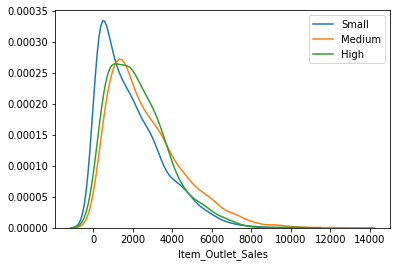


Ventas promedios (Small): 1912.1491613065325
Ventas promedios (Medium): 2681.603541568206
Ventas promedios (High): 2298.9952555793975

 KruskalResult(statistic=283.7772633988232, pvalue=2.390838320650238e-62)


In [30]:
sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data)
plt.show()

med=data.dropna().loc[data['Outlet_Size']=='Medium', 'Item_Outlet_Sales']
hig=data.dropna().loc[data['Outlet_Size']=='High', 'Item_Outlet_Sales']
sma=data.dropna().loc[data['Outlet_Size']=='Small', 'Item_Outlet_Sales']

sns.distplot(sma, kde=True, hist=False, label='Small'), sns.distplot(med, kde=True, hist=False, label='Medium'), sns.distplot(hig, kde=True, hist=False, label='High')
plt.show()

# Cálculo de promedios de ventas de cada tamaño de tienda
print('\nVentas promedios (Small):', sma.mean())
print('Ventas promedios (Medium):', med.mean())
print('Ventas promedios (High):', hig.mean())

print('\n', stats.kruskal(list(med), list(hig), list(sma)))  # H0: las medias son significativamente iguales entre los grupos

Mediante la prueba de Kruskal-Wallis se evidencia diferencias significativas en los niveles de venta para los distintos tamaños de tiendas.

Se somete a prueba las diferencias estadísticas entre el tamaño de tienda Small y High, para descartar similitud en sus ventas:

In [31]:
stats.mannwhitneyu(list(hig), list(med))  # H0: las medias son significativamente iguales para ambos grupos

MannwhitneyuResult(statistic=1168214.5, pvalue=1.3690479019426494e-06)

Se evidencia diferencias significativas entre las ventas promedios de ambos tamaños de tiendas (Medium y High).

Seguidamente se visualiza el comportamiento de las ventas de las tiendas que presentan VALORES PERDIDOS en el tamaño de tienda (Outlet_Size):

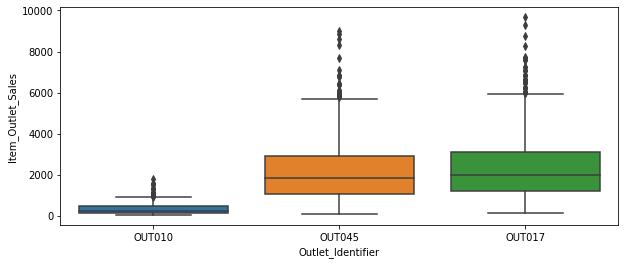

In [32]:
data_aux = data[data['Outlet_Size'].isnull()]
plt.figure(figsize=(10,4))
sns.boxplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=data_aux)
plt.show()

Los valores de ventas en la tienda OUT10 son muy pequeños en comparación a las tiendas OUT17 y OUT45.

Graficando los diagramas box-plot de los niveles de ventas de las tiendas según tamaño (Oulet_Size) vs tipo de tienda (Outlet_Type):

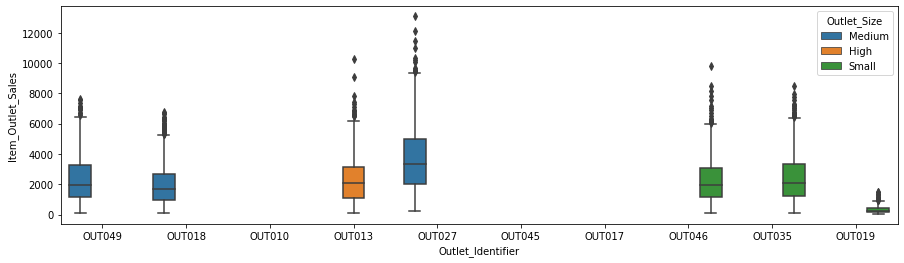

In [33]:
plt.figure(figsize=(15,4))
sns.boxplot(x="Outlet_Identifier", y="Item_Outlet_Sales", hue='Outlet_Size', data=data)
plt.show()

No se muestra algún patrón que se deba destacar.

Graficando diagramas box-plot de los niveles de ventas de las tiendas según el tipo de tienda (Outlet_Type):

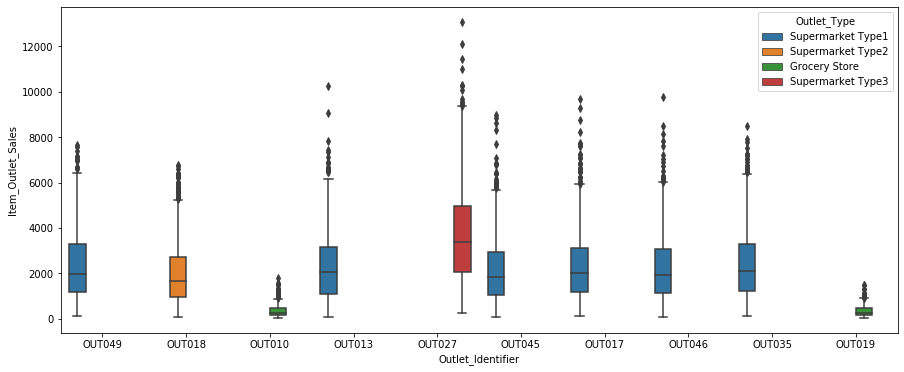

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Outlet_Identifier", y="Item_Outlet_Sales", hue='Outlet_Type', data=data)
plt.show()

Se observa que la tienda OUT10 tiene un comportamiento similar en el nivel de ventas, que las tiendas OUT17 y OUT45 tienen coportamientos similares en sus ventas a las tiendas OUT13 y OUT46 respectivamente.

Se decide asignar a todos los valores perdidos del tamaño de las tiendas, la categoria "Small".

Tomando en consideración lo siguiente:
- El OUT10 es una tienda de tipo "Grocery Store" (lo que implica ser una tienda pequeña) y además tiene unas ventas similares al OUT19.
- El OUT17 es una tienda de tipo "Supermarket Type 1" (la mayoría de las tiendas "Supermarket Type 1" son de tamaño "Small").
- El OUT45 es una tienda de tipo "Supermarket Type 1" (la mayoría de las tiendas "Supermarket Type 1" son de tamaño "Small").

In [35]:
# LIMPIEZA: de faltantes en el tamaño de las tiendas
for outlet in outlets:
    data.loc[data['Outlet_Identifier'] == outlet, 'Outlet_Size'] =  'Small'

Se verifica que no existan valores nulos para la variable peso del producto.

In [36]:
print('El porcentaje de valores perdidos de la variable "Outlet_Size" es de:', data['Outlet_Size'].isnull().sum()/len(data)*100)

El porcentaje de valores perdidos de la variable "Outlet_Size" es de: 0.0


Verificamos de nuevo los valores perdidos:

In [37]:
print('El porcentaje de valores perdidos de las variables: \n')
for var in data.columns:
    print('{} \t\t {:,.2f}%:'.format(var, data[var].isnull().sum()/len(data)*100))

El porcentaje de valores perdidos de las variables: 

Item_Identifier 		 0.00%:
Item_Weight 		 0.00%:
Item_Fat_Content 		 0.00%:
Item_Visibility 		 0.00%:
Item_Type 		 0.00%:
Item_MRP 		 0.00%:
Outlet_Identifier 		 0.00%:
Outlet_Establishment_Year 		 0.00%:
Outlet_Size 		 0.00%:
Outlet_Location_Type 		 0.00%:
Outlet_Type 		 0.00%:
Item_Outlet_Sales 		 40.00%:
Set 		 0.00%:


El 40% de valores perdidos que se observa arriba, corresponde a los datos de test que no contiene esta variale (por ser la variable respuesta que queremos obtener).

Verificando de nuevo los valores de la variables categóricas:

In [38]:
for aux in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    print(aux, ':', set(data[aux]))

Item_Fat_Content : {'Low Fat', 'Regular'}
Item_Type : {'Dairy', 'Household', 'Canned', 'Others', 'Meat', 'Frozen Foods', 'Health and Hygiene', 'Soft Drinks', 'Fruits and Vegetables', 'Baking Goods', 'Breads', 'Starchy Foods', 'Snack Foods', 'Seafood', 'Hard Drinks', 'Breakfast'}
Outlet_Identifier : {'OUT046', 'OUT010', 'OUT045', 'OUT019', 'OUT013', 'OUT049', 'OUT017', 'OUT035', 'OUT027', 'OUT018'}
Outlet_Size : {'High', 'Small', 'Medium'}
Outlet_Location_Type : {'Tier 1', 'Tier 3', 'Tier 2'}
Outlet_Type : {'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3', 'Grocery Store'}


Ya se cuenta con un dataset un poco más limpio. Falta verificar las variables numéricas y recodificar las categorias de la variable "Item_Type"; para esta recodificación prodecemos a realizar primero una pruebas de significancia estadísticas. Pero antes, vemos algunos otros comportamientos bivariados:

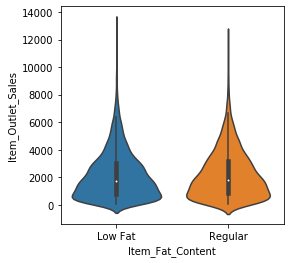

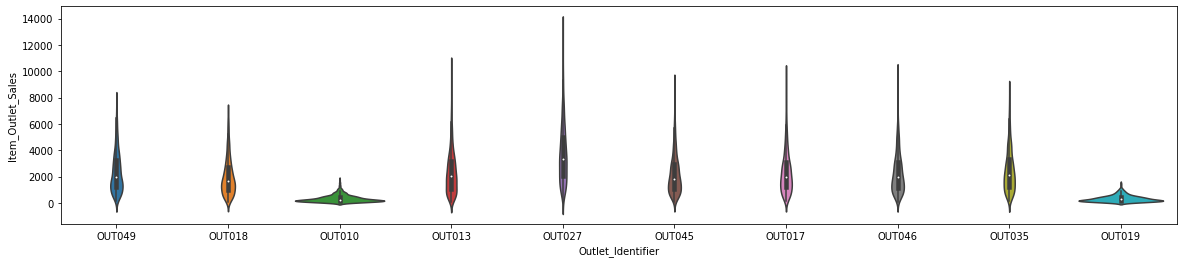

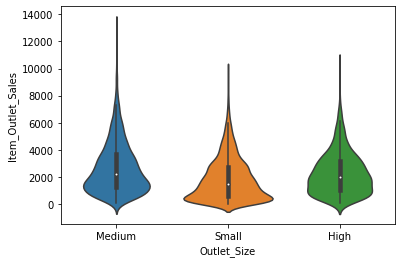

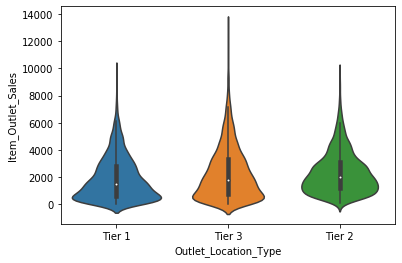

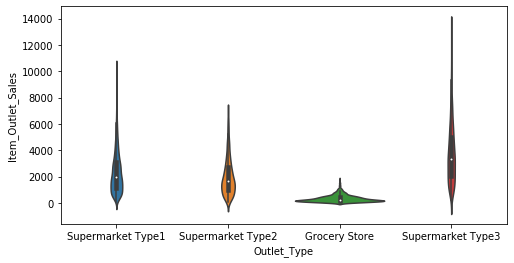

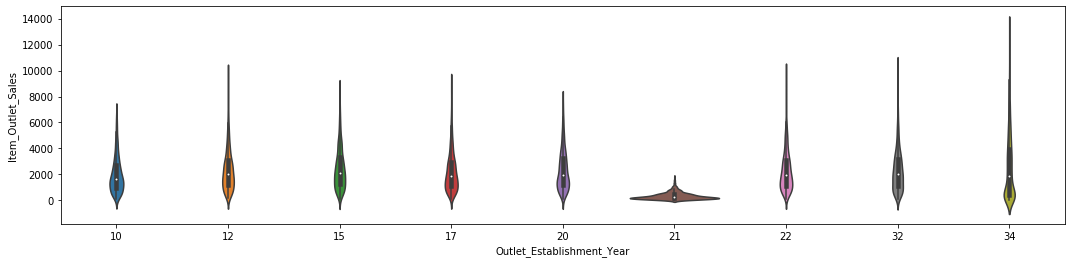

In [39]:
for var in ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']:
    plt.figure(figsize=(len(data[var].unique())*2,4))
    sns.violinplot(x=var, y="Item_Outlet_Sales", data=data)
    plt.show()

Los valores de ventas de las diferentes categorias no tienen distribución normal. Se utilizará el test de Kruskal-Wallis (técnica no paramétrica) para determinar relación significativa entre las distintas variables y los niveles de ventas de la tiendas (TARGET).

In [40]:
# H0: las medias son significativamente iguales entre los grupos
print('Test de Kruskal-Wallis para Item_Fat_Content vs Item_Outlet_Sales:\n\t', stats.kruskal(list(data.dropna().loc[data['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales']), 
                                                                                         list(data.dropna().loc[data['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales'])))

# H0: las medias son significativamente iguales entre los grupos
print('Test de Kruskal-Wallis para Item_Fat_Content vs Item_Outlet_Sales:\n\t', stats.kruskal(list(data.dropna().loc[data['Outlet_Location_Type'] == 'Tier 1', 'Item_Outlet_Sales']), 
                                                                                         list(data.dropna().loc[data['Outlet_Location_Type'] == 'Tier 2', 'Item_Outlet_Sales']), 
                                                                                         list(data.dropna().loc[data['Outlet_Location_Type'] == 'Tier 3', 'Item_Outlet_Sales'])))

Test de Kruskal-Wallis para Item_Fat_Content vs Item_Outlet_Sales:
	 KruskalResult(statistic=3.0077207310075837, pvalue=0.08286874092719329)
Test de Kruskal-Wallis para Item_Fat_Content vs Item_Outlet_Sales:
	 KruskalResult(statistic=155.5056807736284, pvalue=1.7075383551846012e-34)


En los graficos de violin se puede visualizar que el contenido de grasa en los productos no presenta influencia sobre el nivel de ventas y que las otras variables categóricas analizadas si tienen influencia sobre la variable TARGET; esto es corroborado por los test de Kruskal-Wallis realizados.

Respecto de la variable contenido de grasa de los productos, dicha conclusión arriba hecha no se corresponde con lo que se espera; lo que sugiere revisar más a fondo el registro de estas categorias. Para ello, realicemos una vista general de los datos:

In [41]:
data[data['Item_Fat_Content'] == 'Low Fat'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,20,Medium,Tier 1,Supermarket Type1,3735.1380,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,20,Medium,Tier 1,Supermarket Type1,2097.2700,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,32,High,Tier 3,Supermarket Type1,994.7052,train
7,FDP10,19.00,Low Fat,0.127470,Snack Foods,107.7622,OUT027,34,Medium,Tier 3,Supermarket Type3,4022.7636,train
10,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,20,Medium,Tier 1,Supermarket Type1,1516.0266,train


En la 3ra linea se encuentra una inconsistencia; no tiene sentido clasificar como "Low Fat" un producto del hogar. Veamos esto en un gráfico agrupado:

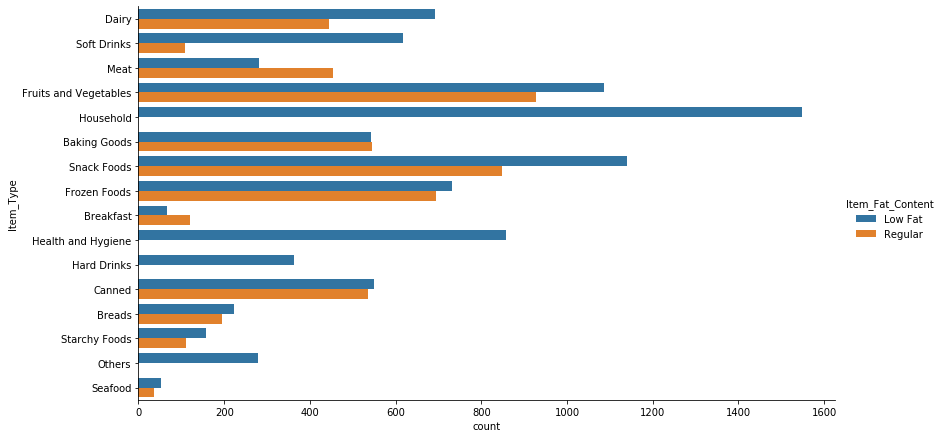

In [42]:
sns.catplot(y="Item_Type", hue="Item_Fat_Content", kind="count", data=data, height=6, aspect=2)
plt.show()

Existen productos con categoría "Low Fat" que no son comestibles o que simplemente no tienen ningún contenido de grasa, para ser consistentes se asigna una nueva categoría NA (No aplica) para los tipos de productos Household, Health and Hygiene, Hard Drinks, Soft Drinks, Fruits and Vegetables:

### Features Engineering:

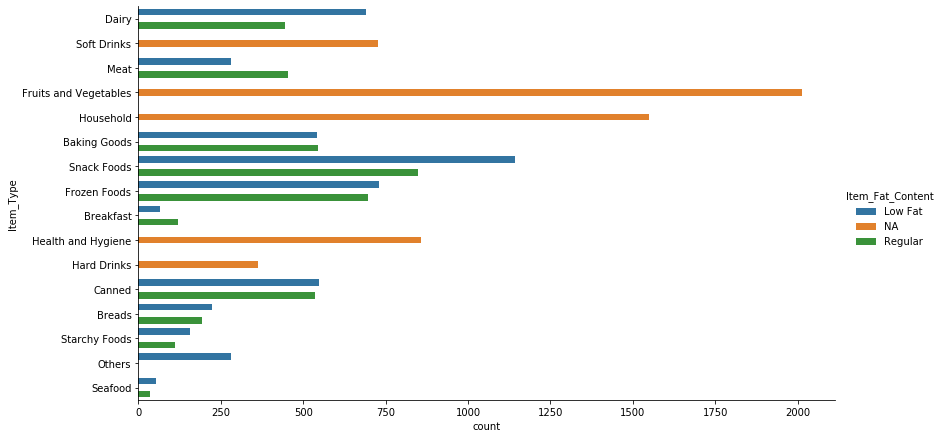

In [43]:
# FEATURES ENGINEERING: asignación de nueva categorías para 'Item_Fat_Content'
for prod in ['Household', 'Health and Hygiene', 'Hard Drinks', 'Soft Drinks', 'Fruits and Vegetables']:
    data.loc[data['Item_Type'] == prod, 'Item_Fat_Content'] = 'NA'
sns.catplot(y="Item_Type", hue="Item_Fat_Content", kind="count", data=data, height=6, aspect=2)
plt.show()

Analicemos los niveles de ventas por contenido de grasa de los productos:

In [44]:
# H0: las medias son significativamente iguales entre los grupos
stats.kruskal(list(data.dropna().loc[data['Item_Fat_Content']== 'Low Fat', 'Item_Outlet_Sales']), list(data.dropna().loc[data['Item_Fat_Content']== 'Regular', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Item_Fat_Content']== 'NA', 'Item_Outlet_Sales']))  

KruskalResult(statistic=1.1657146280085515, pvalue=0.5583008445195801)

No se evidencia diferencias significativas en los niveles de ventas entre las 3 categorias de la característica Item_Fat_Content. Veamos un gráfico de ello:

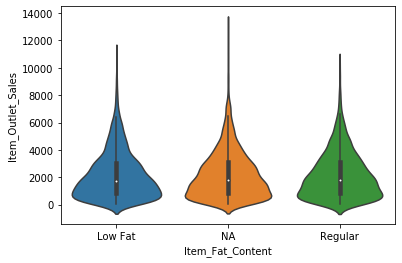

In [45]:
sns.violinplot(x="Item_Fat_Content", y='Item_Outlet_Sales', kind="bar", data=data)
plt.show()

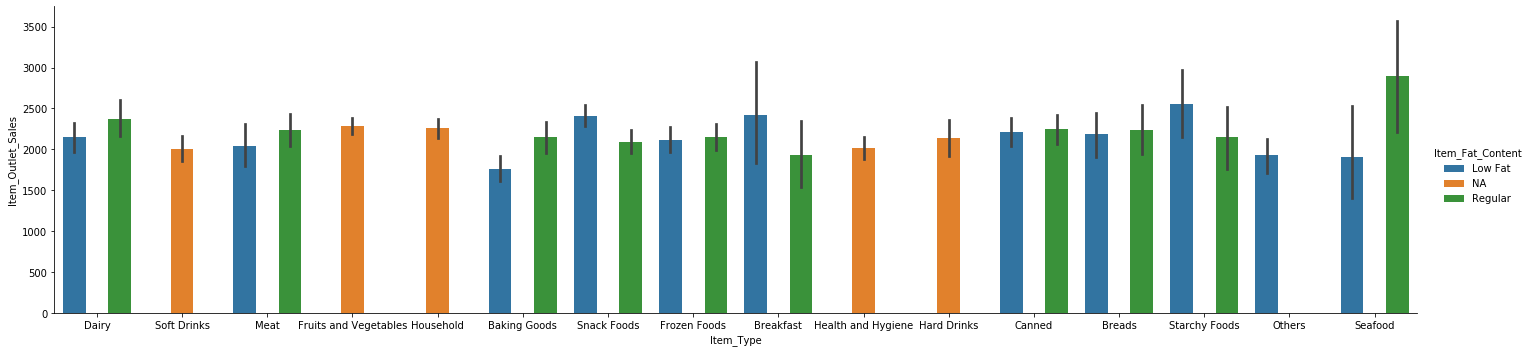

In [46]:
sns.catplot(x="Item_Type", y='Item_Outlet_Sales', hue="Item_Fat_Content", kind="bar", data=data, height=5, aspect=4)
plt.show()

De forma similar lo vemos en el gráfico por tipo de producto, intentemos reagrupar dichas categoría para buscar una relación significativa con el nivel de ventas.

Veamos una clasificación por usos:
- Consultando las categorias de idenificación de los tipos de productos

In [47]:
print(list(data[data['Item_Type'] == 'Others']['Item_Identifier'].unique()))

['NCN07', 'NCO55', 'NCM43', 'NCN55', 'NCO07', 'NCM31', 'NCK19', 'NCO43', 'NCK31', 'NCM07', 'NCM55', 'NCL19', 'NCQ43', 'NCQ38', 'NCP50', 'NCM19', 'NCI31', 'NCN14', 'NCL55', 'NCN43', 'NCJ31', 'NCP43', 'NCP55', 'NCL31', 'NCO02', 'NCM26', 'NCN19', 'NCK07', 'NCL07', 'NCJ19']


In [48]:
print(list(data[data['Item_Type'] == 'Health and Hygiene']['Item_Identifier'].unique()))

['NCB42', 'NCS17', 'NCX29', 'NCP05', 'NCL17', 'NCI17', 'NCR17', 'NCR53', 'NCB06', 'NCU05', 'NCO17', 'NCW29', 'NCM53', 'NCU41', 'NCW17', 'NCW53', 'NCJ29', 'NCX41', 'NCR05', 'NCV17', 'NCC42', 'NCT41', 'NCI29', 'NCR41', 'NCM41', 'NCQ41', 'NCL53', 'NCQ05', 'NCU17', 'NCQ53', 'NCV05', 'NCN29', 'NCR29', 'NCN41', 'NCK17', 'NCY41', 'NCA05', 'NCZ41', 'NCY05', 'NCP29', 'NCM05', 'NCN05', 'NCZ05', 'NCT05', 'NCO41', 'NCZ53', 'NCY29', 'NCK29', 'NCV41', 'NCZ17', 'NCK05', 'NCL29', 'NCX05', 'NCA41', 'NCJ17', 'NCS41', 'NCT29', 'NCO05', 'NCM17', 'NCL05', 'NCH29', 'NCM29', 'NCP41', 'NCA53', 'NCT17', 'NCA17', 'NCD42', 'NCL41', 'NCB54', 'NCJ05', 'NCP53', 'NCS53', 'NCY17', 'NCQ29', 'NCO29', 'NCV53', 'NCS05', 'NCN53', 'NCN17', 'NCX53', 'NCC54', 'NCZ29', 'NCW41', 'NCY53', 'NCK53', 'NCQ17', 'NCO53', 'NCV29', 'NCP17', 'NCS29', 'NCT53', 'NCU29', 'NCX17', 'NCU53', 'NCW05']


In [49]:
print(list(data[data['Item_Type'] == 'Household']['Item_Identifier'].unique()))

['NCD19', 'NCB30', 'NCD06', 'NCP18', 'NCX54', 'NCZ18', 'NCL18', 'NCF19', 'NCP30', 'NCH54', 'NCO26', 'NCC31', 'NCC30', 'NCI18', 'NCB19', 'NCX06', 'NCD30', 'NCZ54', 'NCX42', 'NCR38', 'NCR18', 'NCR54', 'NCF07', 'NCT54', 'NCQ54', 'NCY18', 'NCY30', 'NCO30', 'NCB07', 'NCA54', 'NCF18', 'NCE19', 'NCZ42', 'NCB55', 'NCC06', 'NCJ18', 'NCO54', 'NCE43', 'NCV42', 'NCS54', 'NCH06', 'NCP42', 'NCG42', 'NCK54', 'NCJ54', 'NCN18', 'NCE06', 'NCF31', 'NCH30', 'NCJ30', 'NCQ50', 'NCF42', 'NCE07', 'NCQ42', 'NCG43', 'NCJ42', 'NCE31', 'NCB18', 'NCH55', 'NCV54', 'NCQ02', 'NCZ06', 'NCI43', 'NCT18', 'NCV06', 'NCK06', 'NCO06', 'NCI54', 'NCV30', 'NCB31', 'NCN06', 'NCK42', 'NCR30', 'NCO18', 'NCC43', 'NCL30', 'NCP06', 'NCN26', 'NCG06', 'NCD54', 'NCF54', 'NCW42', 'NCB43', 'NCM54', 'NCM06', 'NCM42', 'NCD07', 'NCP54', 'NCZ30', 'NCG19', 'NCE18', 'NCH18', 'NCA42', 'NCL54', 'NCR06', 'NCX18', 'NCE54', 'NCG18', 'NCP02', 'NCS42', 'NCM18', 'NCT06', 'NCK18', 'NCC55', 'NCU54', 'NCS06', 'NCQ06', 'NCX30', 'NCG07', 'NCH07', 'NCF06', 

En general se observa: FD = ALIMENTOS - NC = HOGAR, SALUD E HIG, OTROS - DR = BEBIDAS, 

In [50]:
# FEATURES ENGINEERING: creando categorías para 'Item_Type'
data['Item_Type'] = data['Item_Type'].replace({'Others': 'Non perishable', 'Health and Hygiene': 'Non perishable', 'Household': 'Non perishable',
 'Seafood': 'Meats', 'Meat': 'Meats',
 'Baking Goods': 'Processed Foods', 'Frozen Foods': 'Processed Foods', 'Canned': 'Processed Foods', 'Snack Foods': 'Processed Foods',
 'Breads': 'Starchy Foods', 'Breakfast': 'Starchy Foods',
 'Soft Drinks': 'Drinks', 'Hard Drinks': 'Drinks', 'Dairy': 'Drinks'})

# FEATURES ENGINEERING: asignación de nueva categorías para 'Item_Fat_Content'
data.loc[data['Item_Type'] == 'Non perishable', 'Item_Fat_Content'] = 'NA'

Visualicemos de nuevo esta recategorización en un gráfico:

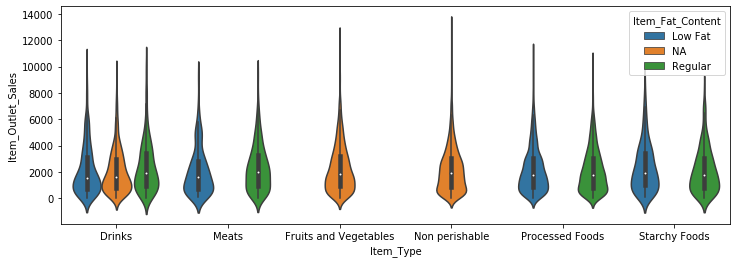

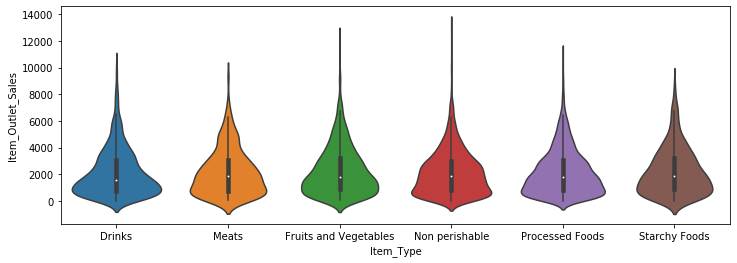

In [51]:
plt.figure(figsize=(12,4))
sns.violinplot(x="Item_Type", y='Item_Outlet_Sales', hue="Item_Fat_Content", data=data)
plt.show()

plt.figure(figsize=(12,4))
sns.violinplot(x='Item_Type', y="Item_Outlet_Sales", data=data)
plt.show()

In [52]:
data['Item_Type'].unique()

array(['Drinks', 'Meats', 'Fruits and Vegetables', 'Non perishable',
       'Processed Foods', 'Starchy Foods'], dtype=object)

In [53]:
# H0: las medias son significativamente iguales entre los grupos
stats.kruskal(list(data.dropna().loc[data['Item_Type']== 'Drinks', 'Item_Outlet_Sales']), list(data.dropna().loc[data['Item_Type']== 'Meats', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Item_Type']== 'Fruits and Vegetables', 'Item_Outlet_Sales']), 
             list(data.dropna().loc[data['Item_Type']== 'Non perishable', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Item_Type']== 'Fruits and Vegetables', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Item_Type']== 'Processed Foods', 'Item_Outlet_Sales']),
             list(data.dropna().loc[data['Item_Type']== 'Starchy Foods', 'Item_Outlet_Sales']))  

KruskalResult(statistic=9.005365622569734, pvalue=0.17327653688196434)

No se evidencia diferencias en los niveles de ventas entre las diferentes categorias de tipo de productos (reagrupados).

### Análisis Bi-variado:
Variables Continuas vs Continuas

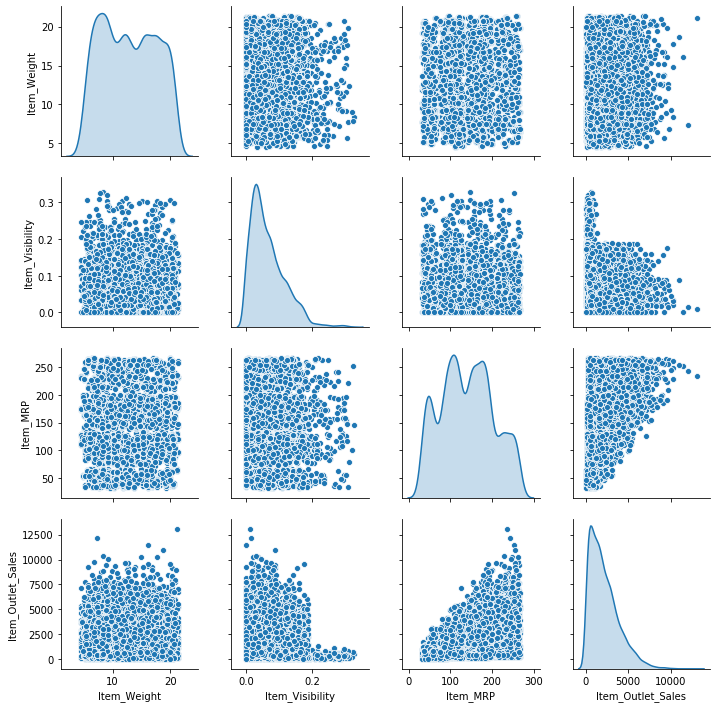

In [54]:
numerics_var = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(data.dropna(), x_vars=numerics_var, y_vars=numerics_var, kind='scatter', diag_kind='kde' )
#plt.savefig('hist_scatter')
plt.show()

No se observa alguna relación significativa entre las variables, lo que señala la necesidad de preprocesar los datos y realizar algunas transformaciones.

Veamos las correlaciones entre estas variables.

In [55]:
data[numerics_var].corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.015412,0.035751,0.013261
Item_Visibility,-0.015412,1.000000,-0.006351,-0.128625
Item_MRP,0.035751,-0.006351,1.000000,0.567574
Item_Outlet_Sales,0.013261,-0.128625,0.567574,1.000000


- La característica con correlación más alta es Item_MRP (r=0.57), corresponde a una correlación de nivel moderado.
- El Target guarda una relación casi nula con los pesos de los productos, mientras que con el grado de visibilidad del producto se observa una correlación baja negativa (r=-0.13). Esta última correlación no parece tener sentido, lo que sugiere que estos valores puede que no esten bien registrados.
- Un aspecto positivo es que la correlación entre las variables independientes es baja, lo que indica que no existe autocorrelación entre estas vraiables.

In [56]:
# FEATURES ENGINEERING: codificando los niveles de precios de los productos
print(pd.qcut(data['Item_MRP'], 4,).unique())
data['Item_MRP'] = pd.qcut(data['Item_MRP'], 4, labels = [1, 2, 3, 4])

[(185.856, 266.888], (31.288999999999998, 94.012], (94.012, 142.247], (142.247, 185.856]]
Categories (4, interval[float64]): [(31.288999999999998, 94.012] < (94.012, 142.247] < (142.247, 185.856] < (185.856, 266.888]]


### Codificación de variables ordinales:
Esta vez no se considera tomar las características: 'Item_Type' y 'Item_Fat_Content'

Se utiliza una copia de data para separar los valores codificados en un dataframe distinto.

In [57]:
dataframe = data.drop(columns=['Item_Type', 'Item_Fat_Content']).copy()
dataframe.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.30,0.016047,4,OUT049,20,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,0.019278,1,OUT018,10,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,0.016760,2,OUT049,20,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,0.000000,3,OUT010,21,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,0.000000,1,OUT013,32,High,Tier 3,Supermarket Type1,994.7052,train


Se decide realizar una codificación manual y no con algún método automático, para guardar el orden de los valores.

In [58]:
ordinals_var = ['Outlet_Size', 'Outlet_Location_Type']

for var in ordinals_var:
    serie_var = dataframe[var].unique()
    serie_var.sort()
    print(var, ':', serie_var)

Outlet_Size : ['High' 'Medium' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 2' 'Tier 3']


In [59]:
# Codificación de variables ordinales
dataframe['Outlet_Size'] = dataframe['Outlet_Size'].replace({'High': 2, 'Medium': 1, 'Small': 0})
dataframe['Outlet_Location_Type'] = dataframe['Outlet_Location_Type'].replace({'Tier 1': 2, 'Tier 2': 1, 'Tier 3': 0}) # Estas categorias se ordenaron asumiendo la categoria 2 como más lejos
dataframe.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.30,0.016047,4,OUT049,20,1,2,Supermarket Type1,3735.1380,train
1,DRC01,5.92,0.019278,1,OUT018,10,1,0,Supermarket Type2,443.4228,train
2,FDN15,17.50,0.016760,2,OUT049,20,1,2,Supermarket Type1,2097.2700,train
3,FDX07,19.20,0.000000,3,OUT010,21,0,0,Grocery Store,732.3800,train
4,NCD19,8.93,0.000000,1,OUT013,32,2,0,Supermarket Type1,994.7052,train


### Codificación de variables nominales:

In [60]:
dataframe = pd.get_dummies(dataframe, columns=['Outlet_Type'])
dataframe.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,4,OUT049,20,1,2,3735.1380,train,0,1,0,0
1,DRC01,5.92,0.019278,1,OUT018,10,1,0,443.4228,train,0,0,1,0
2,FDN15,17.50,0.016760,2,OUT049,20,1,2,2097.2700,train,0,1,0,0
3,FDX07,19.20,0.000000,3,OUT010,21,0,0,732.3800,train,1,0,0,0
4,NCD19,8.93,0.000000,1,OUT013,32,2,0,994.7052,train,0,1,0,0


In [61]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
Item_Identifier                  14204 non-null object
Item_Weight                      14204 non-null float64
Item_Visibility                  14204 non-null float64
Item_MRP                         14204 non-null category
Outlet_Identifier                14204 non-null object
Outlet_Establishment_Year        14204 non-null int64
Outlet_Size                      14204 non-null int64
Outlet_Location_Type             14204 non-null int64
Item_Outlet_Sales                8523 non-null float64
Set                              14204 non-null object
Outlet_Type_Grocery Store        14204 non-null uint8
Outlet_Type_Supermarket Type1    14204 non-null uint8
Outlet_Type_Supermarket Type2    14204 non-null uint8
Outlet_Type_Supermarket Type3    14204 non-null uint8
dtypes: category(1), float64(3), int64(3), object(3), uint8(4)
memory usage: 1.0+ MB
None


Revisamos los valores de correlación:

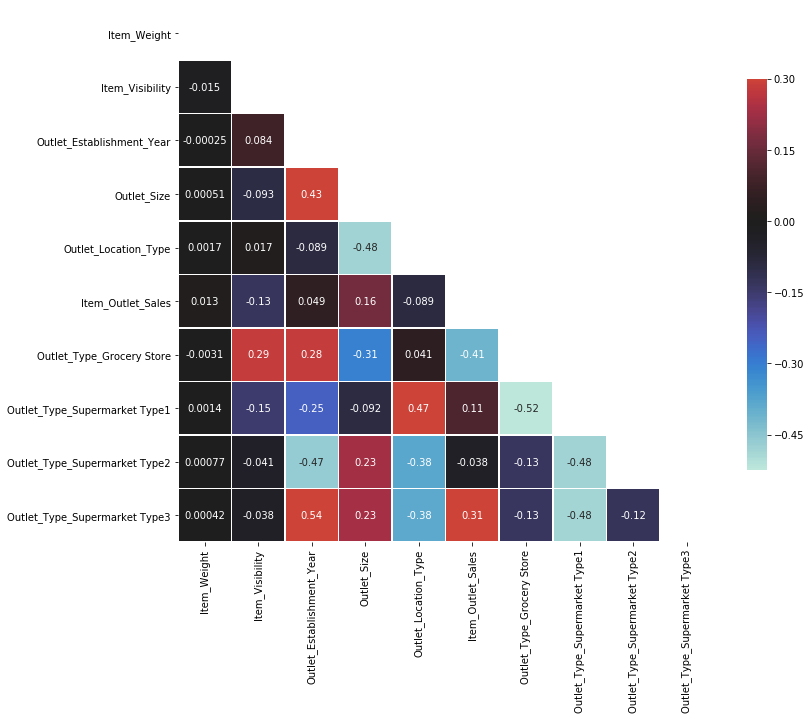

In [62]:
mask = np.zeros_like(dataframe.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(dataframe.corr(), mask=mask, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()

- El coeficiente de correlación entre las variables independientes es entre bajo y medio, lo que indica que no existe autocorrelación fuerte entre estas variables.

### Preparando data de entrenamiento y de test

In [64]:
# Eliminación de variables que no contribuyen a la predicción por ser muy específicas
dataset = dataframe.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

# División del dataset de train y test
df_train = dataset.loc[data['Set'] == 'train']
df_test = dataset.loc[data['Set'] == 'test']

# Eliminando columnas sin datos
df_train.drop(['Set'], axis=1, inplace=True)
df_test.drop(['Item_Outlet_Sales','Set'], axis=1, inplace=True)

# Guardando los datasets
df_train.to_csv("train_final.csv")
df_test.to_csv("test_final.csv")

In [65]:
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,20,1,2,3735.1380,0,1,0,0
1,5.92,0.019278,1,10,1,0,443.4228,0,0,1,0
2,17.50,0.016760,2,20,1,2,2097.2700,0,1,0,0
3,19.20,0.000000,3,21,0,0,732.3800,1,0,0,0
4,8.93,0.000000,1,32,2,0,994.7052,0,1,0,0


In [66]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750,0.007565,2,20,1,2,0,1,0,0
8524,8.300,0.038428,1,12,0,1,0,1,0,0
8525,14.600,0.099575,4,21,0,0,1,0,0,0
8526,7.315,0.015388,3,12,0,1,0,1,0,0
8527,13.600,0.118599,4,34,1,0,0,0,0,1


In [67]:
# Importando librerías para el modelo
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Métricas del Modelo:
ENTRENAMIENTO: RMSE: 1169.35 - R2: 0.5284
VALIDACIÓN: RMSE: 1146.66 - R2: 0.5526

Coeficientes del Modelo:
Intersección: 243.07
                        features  Coeficiente Estimados
0                    Item_Weight              -2.332949
1                Item_Visibility            -311.774516
2                       Item_MRP             825.276595
3      Outlet_Establishment_Year             -10.632046
4                    Outlet_Size             102.518103
5           Outlet_Location_Type              27.760861
6      Outlet_Type_Grocery Store           -1664.691331
7  Outlet_Type_Supermarket Type1             191.570173
8  Outlet_Type_Supermarket Type2            -242.596116
9  Outlet_Type_Supermarket Type3            1715.717274 



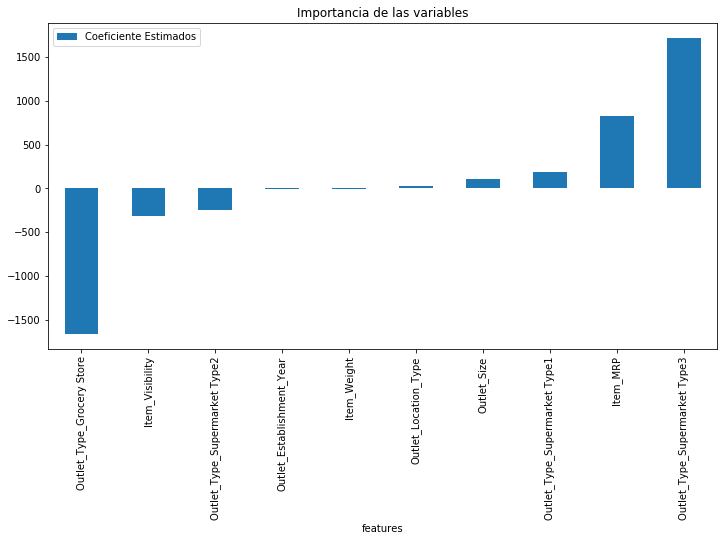

In [68]:
seed = 28
model = LinearRegression()

# División de dataset de entrenaimento y validación
X = df_train.drop(columns='Item_Outlet_Sales') #[['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']] # .drop(columns='Item_Outlet_Sales')
x_train, x_val, y_train, y_val = train_test_split(X, df_train['Item_Outlet_Sales'], test_size = 0.3, random_state=seed)

# Entrenamiento del modelo
model.fit(x_train,y_train)

# Predicción del modelo ajustado para el conjunto de validación
pred = model.predict(x_val)

# Cálculo de los errores cuadráticos medios y Coeficiente de Determinación (R^2)
mse_train = metrics.mean_squared_error(y_train, model.predict(x_train))
R2_train = model.score(x_train, y_train)
print('Métricas del Modelo:')
print('ENTRENAMIENTO: RMSE: {:.2f} - R2: {:.4f}'.format(mse_train**0.5, R2_train))

mse_val = metrics.mean_squared_error(y_val, pred)
R2_val = model.score(x_val, y_val)
print('VALIDACIÓN: RMSE: {:.2f} - R2: {:.4f}'.format(mse_val**0.5, R2_val))

print('\nCoeficientes del Modelo:')
# Constante del modelo
print('Intersección: {:.2f}'.format(model.intercept_))

# Coeficientes del modelo
coef = pd.DataFrame(x_train.columns, columns=['features'])
coef['Coeficiente Estimados'] = model.coef_
print(coef, '\n')
coef.sort_values(by='Coeficiente Estimados').set_index('features').plot(kind='bar', title='Importancia de las variables', figsize=(12, 6))

plt.show()

## Principales variables utilizadas por el modelo:
- Con relación directa: Outlet_Type_Supermarket Type3, Item_MRP
- Con relación inversa: Outlet_Type_Grocery Store, Item_Visibility

## SUPUESTO DE REGRESIÓN LINEAL:
1. Existe relación lineal entre la *variable respuesta y las variables predictoras.*
2. Las variables predictoras (independientes) no están correlacionadas entre sí. La presencia de colinealidad conduce a un fenómeno conocido como multicolinealidad. 
3. Los residuos no están correlacionados. De lo contrario, presentará autocorrelación. 
4. Los residuos deben tener una varianza constante. La varianza no constante conduce a heterocedasticidad.

Coeficiente de asimetría: -0.7278681442205317


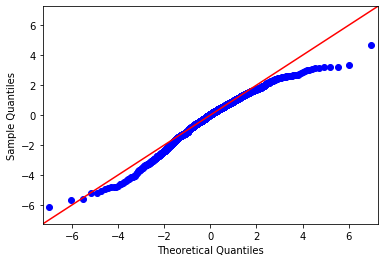

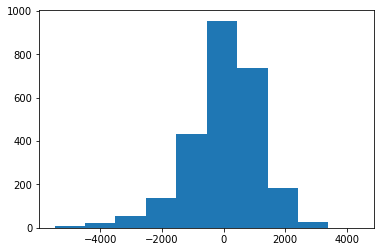

In [69]:
import scipy.stats as stats

res = pred - y_val
print('Coeficiente de asimetría:', res.skew())
sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()
plt.hist(res)
plt.show()

Los residuos no presentan distribución normal, y tienen una asimetría izquierda.

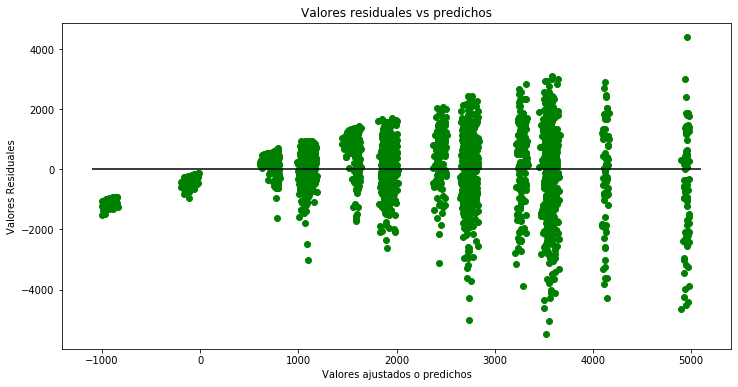

In [70]:
# residual plot 
plt.figure(figsize=(12,6))
x_plot = plt.scatter(pred, (pred - y_val), c='g') 
plt.hlines(y=0, xmin= -1100, xmax=5100)
plt.xlabel('Valores ajustados o predichos')
plt.ylabel('Valores Residuales')
plt.title('Valores residuales vs predichos')
plt.show()

El gráfico presenta forma de embudo, no existe sesgo pero si *heterocedasticidad*; la dispersión vertical indica varianza no constante.

### Aplicación del modelo en el dataset de test

In [71]:
# Predicción del modelo ajustado
data_test = df_test.copy()
data_test['pred_Sales'] = model.predict(data_test)
data_test.to_csv('data_test')
data_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,pred_Sales
8523,20.750,0.007565,2,20,1,2,0,1,0,0,1979.827531
8524,8.300,0.038428,1,12,0,1,0,1,0,0,1128.751306
8525,14.600,0.099575,4,21,0,0,1,0,0,0,1591.108584
8526,7.315,0.015388,3,12,0,1,0,1,0,0,2788.785512
8527,13.600,0.118599,4,34,1,0,0,0,0,1,4932.220314


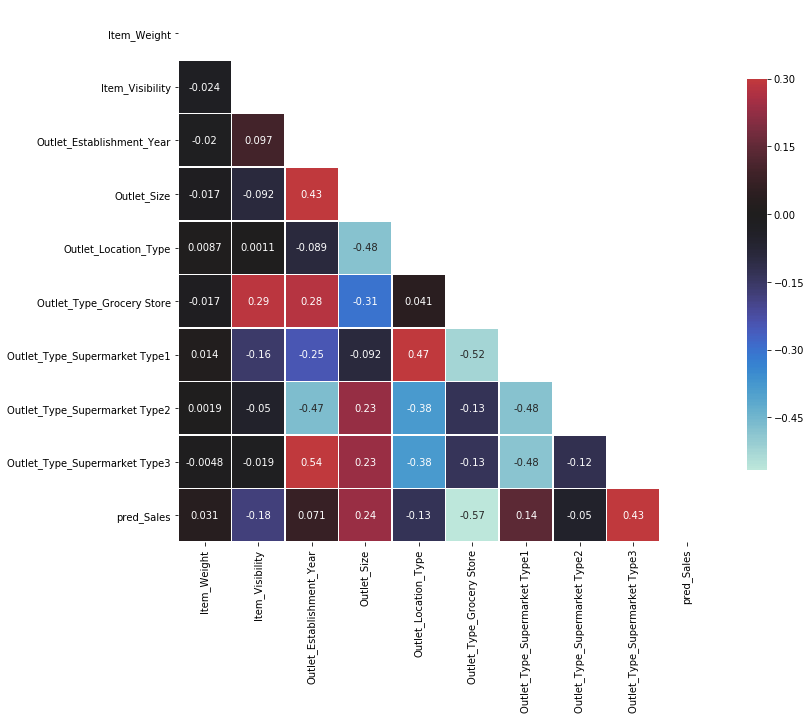

In [72]:
mask = np.zeros_like(data_test.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(data_test.corr(), mask=mask, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()

Se obtienen valores similares de correlación entre las variables.

### INFORMACIÓN ADICIONAL NECESARIA
¿Qué otras fuentes de datos o información crees que serían interesantes para mejorar tu análisis?

- Generalmente el código de un producto está asociado con alguna descripción del mismo, sabiendo el significado de las letras del código seguramente se podrá tener alguna información adicional para agrupar de manera más eficiente las categorias de tipo de producto.
- Frecuencia mensual de compra de los productos en las respectivas tiendas
- Periodo de recolección de la data con la que se trabajó
- Tener el conocimiento si en el periodo determinado hubo alguna promocion en la tienda con el producto específico, ayudaría a saber si es un factor influyente.
- Saber la fecha de los registros daría información para un estudio de tendencia y estacionalidad; habran productos que se vendan más en unas épocas del año que en otras, y algunos productos estarán en fase de crecimiento, decrecimiento o lateral de sus ventas.
- Tener un factor de comparación de precios propios con respecto al mercado, que permita saber si este se situa por arriba o por debajo del precio del mercado; factor que puede incidir en la decisión de compra.
- Considerar los posibles cambios de precio en el tiempo, así como los cambios en los hábitos de consumo.